In [2]:
import json
import random
from pycocotools.coco import COCO
from pycocotools.mask import decode
import cv2
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point, mapping


# Path to the COCO annotations file
ann_path = "annotations_trainval2017/annotations/instances_train2017.json"
img_path = "train2017"

# Initializing COCO object
coco = COCO(ann_path)


loading annotations into memory...
Done (t=7.52s)
creating index...
index created!


In [20]:
# Getting all categories and images
# img_ids = coco.getImgIds()
# print(img_ids[-1:])
# print(len(set(img_ids)))
# ann_ids = coco.getAnnIds(imgIds=img_ids)
# ann_data = coco.loadAnns(ann_ids)
# ann_image = coco.loadImgs(img_ids)
# image_path = "train2017/{}".format(ann_image[0]['file_name']
# print(image_path)

# # Output path for the new json file
# output_path = 'train_random_points/{}_points.json'.format(ann_image[0]['file_name'])



In [28]:
# VERIFICATION
img_ids = coco.getImgIds()[117443]
ann_ids = coco.getAnnIds(imgIds=img_ids)
ann_data = coco.loadAnns(ann_ids)
ann_image = coco.loadImgs(img_ids)

image_path = "train2017/{}".format(ann_image[0]['file_name'])
print(image_path)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cat_ids = coco.getCatIds()

points = []
for ann in ann_data:
    if 'segmentation' in ann and type(ann['segmentation']) == list:
        for segmentation in ann['segmentation']:
            # single_mask = coco.annToMask(ann)
            # plt.imshow(single_mask)
            # label_name = coco.loadCats(ann['category_id'])[0]['name']
            # print(label_name)
            # layers += 1
            coords = np.asarray(segmentation).reshape(len(segmentation)//2, 2)
            # # print(coords.tolist())
            poly = Polygon(coords.tolist())
            center_point = poly.representative_point()
            # print(center_point)
            # min_x, min_y, max_x, max_y = poly.bounds

            # while True:
            #     random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
            #     if (random_point.within(poly)):
            point_coord = mapping(center_point)['coordinates']
            points.append({
                'image_id': ann['image_id'],
                'category_id': ann['category_id'],
                'point': point_coord,
                'label': coco.loadCats(ann['category_id'])[0]['name']
            })

print(points)

train2017/000000360277.jpg
[{'image_id': 360277, 'category_id': 49, 'point': (479.4934066221411, 311.515), 'label': 'knife'}, {'image_id': 360277, 'category_id': 51, 'point': (135.48093871946813, 149.19), 'label': 'bowl'}, {'image_id': 360277, 'category_id': 55, 'point': (308.277653147444, 198.31), 'label': 'orange'}, {'image_id': 360277, 'category_id': 55, 'point': (380.2007463534194, 155.325), 'label': 'orange'}, {'image_id': 360277, 'category_id': 55, 'point': (445.3613781069118, 217.41), 'label': 'orange'}, {'image_id': 360277, 'category_id': 55, 'point': (284.02576271186445, 25.43), 'label': 'orange'}, {'image_id': 360277, 'category_id': 55, 'point': (119.39781390237323, 133.2), 'label': 'orange'}, {'image_id': 360277, 'category_id': 55, 'point': (175.4897188449848, 88.00999999999999), 'label': 'orange'}, {'image_id': 360277, 'category_id': 55, 'point': (22.67658219631834, 100.03999999999999), 'label': 'orange'}, {'image_id': 360277, 'category_id': 55, 'point': (25.49085925349922,

In [35]:
file_no = 0

for img_id in img_ids:
    ann_ids = coco.getAnnIds(imgIds=img_id)
    ann_data = coco.loadAnns(ann_ids)
    ann_image = coco.loadImgs(img_id)
    image_path = "train2017/{}".format(ann_image[0]['file_name'])
    print(image_path)

    # Output path for the new json file
    output_path = 'train_points/{}_points.json'.format(ann_image[0]['file_name'][:-4])

# image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    points = []
    for ann in ann_data:
        if 'segmentation' in ann and type(ann['segmentation']) == list:
            for segmentation in ann['segmentation']:
                # single_mask = coco.annToMask(ann)
                # plt.imshow(single_mask)
                # label_name = coco.loadCats(ann['category_id'])[0]['name']
                # print(label_name)
                # layers += 1
                coords = np.asarray(segmentation).reshape(len(segmentation)//2, 2)
                # # print(coords.tolist())
                poly = Polygon(coords.tolist())
                center_point = poly.centroid
                # print(center_point)
                # min_x, min_y, max_x, max_y = poly.bounds

                # while True:
                #     random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
                #     if (random_point.within(poly)):
                point_coord = mapping(center_point)['coordinates']
                points.append({
                    'image_id': ann['image_id'],
                    'category_id': ann['category_id'],
                    'point': point_coord,
                    'label': coco.loadCats(ann['category_id'])[0]['name']
                })
                
                #         break

                
        with open(output_path, 'w') as output_file:
            json.dump(points, output_file)

        output_file.close()
    file_no += 1
    print(file_no)
# print(layers)
# print(points)


train2017/000000391895.jpg
train2017/000000522418.jpg
train2017/000000184613.jpg
train2017/000000318219.jpg
train2017/000000554625.jpg
train2017/000000574769.jpg
train2017/000000060623.jpg
train2017/000000309022.jpg
train2017/000000005802.jpg
train2017/000000222564.jpg
train2017/000000118113.jpg
train2017/000000193271.jpg
train2017/000000224736.jpg
train2017/000000483108.jpg
train2017/000000403013.jpg
train2017/000000374628.jpg
train2017/000000328757.jpg
train2017/000000384213.jpg
train2017/000000293802.jpg
train2017/000000086408.jpg
train2017/000000372938.jpg
train2017/000000386164.jpg
train2017/000000223648.jpg
train2017/000000204805.jpg
train2017/000000113588.jpg
train2017/000000384553.jpg
train2017/000000337264.jpg
train2017/000000368402.jpg
train2017/000000012448.jpg
train2017/000000079841.jpg
train2017/000000515289.jpg
train2017/000000562150.jpg
train2017/000000542145.jpg
train2017/000000412151.jpg
train2017/000000579003.jpg
train2017/000000540186.jpg
train2017/000000242611.jpg
t

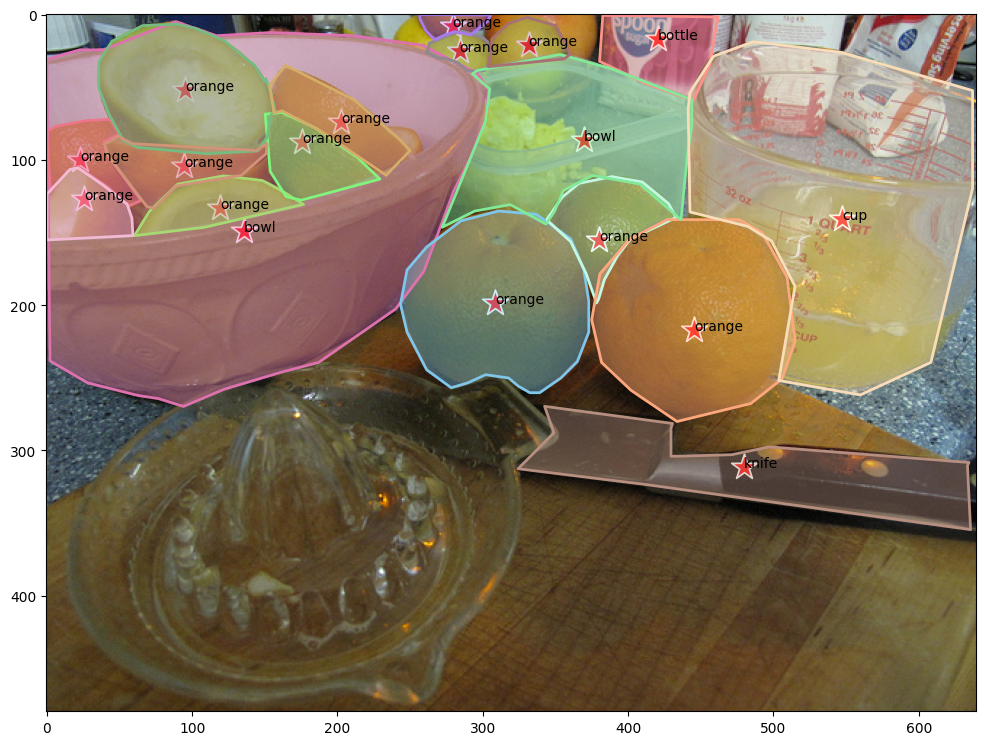

In [29]:

plt.figure(figsize=(12, 12))
plt.imshow(image)
for pt in points:
  plt.scatter(pt['point'][0], pt['point'][1], color="red", marker='*', s=375, edgecolor='white', linewidth=1.25)
  plt.annotate(pt['label'],[pt['point'][0], pt['point'][1]], color="black", )
coco.showAnns(ann_data)
# print(ann_data)
# mask = coco.annToMask(ann_data[0])
# for i in range(len(ann_data)):
#   mask += coco.annToMask(ann_data[i])

# kernel = np.ones((3,3),np.uint8)
# eroded_mask = cv2.erode(mask, kernel, iterations=1)

# x, y = np.where(mask == 1)
# print(x, y)

# np.savetxt('binaryMask.txt', mask, fmt='%d')

# plt.imshow(mask)